# ML Lab07-2 : Meet MNIST Datset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epch:0001 cost =  2.709861920
Epch:0002 cost =  1.142232756
Epch:0003 cost =  0.910223033
Epch:0004 cost =  0.793498486
Epch:0005 cost =  0.718433119
Epch:0006 cost =  0.665098684
Epch:0007 cost =  0.624866126
Epch:0008 cost =  0.592659530
Epch:0009 cost =  0.567058191
Epch:0010 cost =  0.545026293
Epch:0011 cost =  0.526715620
Epch:0012 cost =  0.510526478
Epch:0013 cost =  0.496533751
Epch:0014 cost =  0.484279632
Epch:0015 cost =  0.472980749
Accuracy:  0.8904
Label: [1]
Prediction: [1]


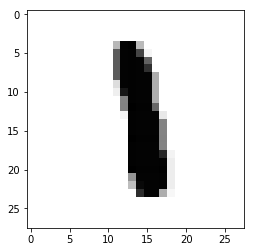

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random


from tensorflow.examples.tutorials.mnist import input_data
# check out https://www.tensorflow.org/get_started/mnist/beginnners for
# more information about the mnist dataset

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28*28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 nb_classes
Y = tf.placeholder(tf.float32, [None, nb_classes])


W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Softmax!!

# tf.nn.softmax compute softmax activations
# softmax = exp(Logistic) / reduce_sum(exp(Logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/Loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# ------------ 위의 소스 코드까지가 graph ----------------------


# Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Training epoch/batch
# epoch(에폭) : 전체 dataset을 한 번 다 학습 시키는 것을 1 epoch이라고 한다.
# batch size : 1 epoch을 하려고 하는데 dataset이 너무 큰 경우 잘라서 넣어줘야하는데 그 자르는 size를 batch size라고 한다.

# Example : TrainingSet이 1000개가 있고 batch size가 500인 경우, 2 iteration 하면 1 epoch이 된다.
 
# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(training_epochs): # dataset을 training_epoch번 학습할꺼야
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size) # 전체 data set을 batch_size로 나눈 번만큼 학습을 해야 1 epoch을 학습 가능
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print 'Epch:' '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost)


    # Test the model using test sets
    print "Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels})




    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print "Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))
    print "Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                 feed_dict={X: mnist.test.images[r:r + 1]})

    plt.imshow(mnist.test.images[r:r + 1].
              reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()